In [2]:
import networkx as nx
from Experiments import log_progress
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import nltk
from nltk.corpus import stopwords
from Extends import draw_groups, col
stopwords = stopwords.words('english')
%matplotlib inline 

In [154]:
author_data_path = r'../data/weighted/AMiner-Author.txt'
graph_data_path = r'../data/weighted/AMiner-Coauthor.txt'
raw_data_path = r'C:\Users\zurk\Downloads\AMiner-Paper\AMiner-Paper.txt'

In [159]:
with file(raw_data_path[:-4] + '-part.txt', 'w') as out:
    for indx, line in enumerate(file(raw_data_path)):
        if indx > 40000:
            break
        out.write(line)

In [4]:
comm_key = 't'

In [6]:
def parse_graph(f):
    G=nx.read_weighted_edgelist(f)
    return G

def parse_author_info(f):
    res = {}
    cur = {}
    for line in log_progress(f, every=1000000):
        if line[0]=='#':
            indx, val = line[1:-1].split(' ', 1)
            if indx in {'index', 'pc', 'cn'}:
                cur[indx] = int(val)
            elif indx == 'pi' or indx == 'upi':
                cur[indx] = float(val)
            elif indx == 'a' or indx == 't':
                cur[indx] = val.split(';') if val != '' else []
            else:
                cur[indx] = val
            if val == ',':
                print cur['index']
        elif line[0]=='\n':
            res[cur['index']] = cur
            cur = {}
    return res

In [7]:
author_info = parse_author_info(file(author_data_path))
print len(author_info)

311813
624960
1712433


In [8]:
author_info[6]

{'a': [],
 'cn': 0,
 'hi': '0',
 'index': 6,
 'n': 'S. Wanstedt',
 'pc': 1,
 'pi': 0.0,
 't': ['average quality',
  'speech quality',
  'long samplesSpeech quality',
  'subjective quality',
  'long speech segment',
  'short speech sample',
  'speech form',
  'common objective method',
  'objective measurement',
  'subjective listening test'],
 'upi': 0.0}

In [17]:
affiliations_set = {}
for key in log_progress(author_info, every=100000):
    for aff in author_info[key][comm_key]:
        if aff in affiliations_set:
            affiliations_set[aff].append(key)
        else:
            affiliations_set[aff] = []

to_del = []
for key in log_progress(affiliations_set, every=100000):
    if len(affiliations_set[key]) < 2:
        to_del.append(key)
for key in to_del:
    del affiliations_set[key]
    
no_aff = []
for key in log_progress(author_info, every=100000):
    for key2 in author_info[key][comm_key]:
        if key2 in affiliations_set:
            break
    else:
        no_aff.append(key)
        
print "{} comm too small".format(len(to_del))

2862775 comm too small


In [18]:
print 'Total Authors count              : {}'.format(len(author_info))
print 'Authors without affiliation count: {}, {:.2f}%'.format(len(no_aff), len(no_aff) * 100.0 / len(author_info))
print 'Unique affiliation count         : {}'.format(len(affiliations_set))

Total Authors count              : 1712433
Authors without affiliation count: 82414, 4.81%
Unique affiliation count         : 1192912


In [19]:
aff_s = sorted(affiliations_set)
print '\n'.join(aff_s[:2000])

0-Hecke algebra H
0-based process
0-bowl molecular wire
0-compact set
0-connected component
0-continuous basis function
0-dB SNR source
0-day attack
0-day malware
0-day malware infection
0-day malware instance
0-derivative PCBM
0-dimensional model
0-dimensional plasma model
0-excellent graphsClaude
0-extension problem
0-g environment
0-hardened SRAM cell
0-interior penalty method
0-level packaging method
0-like promoter
0-simple semigroups
0-tight nus integer
000-acre Connecticut Tract
000-ft inspection
000-leg weekly problem
000-line high-resolution camera
000-node system
000-ton heavy haul freight
000-ton-class training ship
000-word database
000-word-scale corpus
048-node Blue Gene
1-Bit ALU
1-COS gust profile
1-D Array ProbeFor
1-D CA
1-D DCT
1-D DGS
1-D DGS circuit
1-D DWT
1-D DWT block
1-D DWT core
1-D ECG data
1-D EMD
1-D FFT
1-D FFT algorithm
1-D FFTIn high-performance computing
1-D HMM character recognition
1-D Hidden Markov model
1-D IDCT
1-D IDCT operation
1-D Kalman
1-D LFM

Разберемся с этим и выделим названия одного и того же

In [20]:
def clear(w):
    for c in '(),.!/?\\\"\'#':
        w = w.replace(c, '')
        
    return w.lower()
words = {}
for key in affiliations_set:
    for w in key.split():
        w = clear(w)
        if w in words:
            words[w] += 1
        else:
            words[w] = 1

In [21]:
def good(word):
    if word.isdigit():
        return False if comm_key == 'a' else True
    if "@" in word:
        return False
    if len(word) < 3:
        return False
    if word in stopwords:
        return False
    return True

words_s = sorted([(key, words[key]) for key in words if good(key)], key = lambda x: -x[1])
print '\n'.join(['{} {}'.format(x,y) for x,y in words_s[:1000]])
#stop = [x[0] for x in words_s[:100]]
#print'\n'.join(stop)

system 47274
model 29939
data 28565
method 21548
network 20981
algorithm 20393
control 14525
information 14192
design 13891
new 13627
image 13509
analysis 11533
problem 11059
process 10996
service 10850
software 9636
management 9517
different 9412
paper 9291
application 8859
approach 8596
performance 8545
power 7978
technique 7853
technology 7802
web 7606
dynamic 7517
scheme 7449
time 7407
structure 7117
simulation 6944
detection 6887
high 6797
test 6718
function 6430
mobile 6404
environment 6320
video 6264
architecture 6081
digital 5993
fuzzy 5764
communication 5589
signal 5504
proposed 5398
development 5387
feature 5282
user 5214
novel 5184
security 5132
computer 5121
tool 5086
adaptive 5055
sensor 4962
learning 4935
flow 4931
research 4866
virtual 4865
processing 4856
language 4851
current 4790
quality 4773
pattern 4739
level 4687
parallel 4677
protocol 4647
rate 4596
multiple 4534
search 4533
program 4522
project 4515
framework 4474
knowledge 4442
efficient 4398
energy 4325
traffic

In [22]:
for i, k in enumerate(affiliations_set):
    print len(affiliations_set[k]), k
    if i > 10:
        break

3 marketing decision maker
2 point v
5 point q
34 point p
7 Enhancing creativity
3 Mongolian tax information systemThe
2 SIFT point
2 point m
6 POWER6 chip
16 point P
9 LR algorithm
4 pointer aliasing


In [23]:
def get_clear_name(name):
    if comm_key == 'a':
        clear_name = []
        for w in name.split():
            w = clear(w)
            if good(w):
                clear_name.append(w)
        return set(clear_name)
    else:
        res = min(name.split(), key=lambda x: words[clear(x)])
        return res

bad_names = []
affiliations_set_correspond_inv = {}
for key in log_progress(aff_s):
    indx_new = get_clear_name(key)
    if indx_new is None:
        bad_names.append(key)
        continue
    if len(indx_new) == 0:
        continue
    if comm_key == 'a':
        for indx in affiliations_set_correspond_inv:
            t = set(indx.split()) 
            if 1.0 * len(t & indx_new) / len(t | indx_new) > 0.5:
                affiliations_set_correspond_inv[indx].append(key)
                t = t & indx_new
                affiliations_set_correspond_inv[' '.join(sorted(t))] = affiliations_set_correspond_inv[indx]
                del affiliations_set_correspond_inv[indx]
                break
        else:
            affiliations_set_correspond_inv[' '.join(sorted(indx_new))] = [key]   
    if comm_key == 't':
        if indx_new in affiliations_set_correspond_inv:
            affiliations_set_correspond_inv[indx_new].append(key)
        else:
            affiliations_set_correspond_inv[indx_new] = [key]
    
print 'Bad names number: {}'.format(len(bad_names))

Bad names number: 0


In [24]:
affiliations_set_correspond = {}
for key in affiliations_set_correspond_inv:
    for key2 in affiliations_set_correspond_inv[key]:
        affiliations_set_correspond[key2] = key

In [25]:
for indx, key in enumerate(sorted(affiliations_set_correspond_inv, key = lambda x: -len(affiliations_set_correspond_inv[x]))):
    print key, '!!!:!!!', affiliations_set_correspond_inv[key]
    if indx > 0:
        break

appropriate !!!:!!! ['Design appropriate course', 'appropriate Grid service', 'appropriate Information model', 'appropriate Internet use', 'appropriate Language', 'appropriate Web service', 'appropriate access network', 'appropriate activity', 'appropriate adaptive control strategy', 'appropriate adaptive function', 'appropriate agent', 'appropriate algorithm', 'appropriate allocation', 'appropriate allocation policy', 'appropriate analysis', 'appropriate analysis method', 'appropriate analysis model', 'appropriate analysis tool', 'appropriate application', 'appropriate application area', 'appropriate application program', 'appropriate approach', 'appropriate architecture', 'appropriate assessment tool', 'appropriate average', 'appropriate base', 'appropriate behavior', 'appropriate block', 'appropriate boundary', 'appropriate boundary condition', 'appropriate boundary control input', 'appropriate business model', 'appropriate business service', 'appropriate business value', 'appropria

In [26]:
aff_s_inv = sorted(affiliations_set_correspond_inv)
print '* ' + '\n* '.join(affiliations_set_correspond_inv[key][0] for key in aff_s_inv[:2000])

* 0-Hecke algebra H
* 0-based process
* 0-bowl molecular wire
* 0-compact set
* 0-connected component
* 0-continuous basis function
* 0-dB SNR source
* 0-day attack
* 0-derivative PCBM
* 0-dimensional model
* 0-excellent graphsClaude
* 0-extension problem
* 0-g environment
* 0-hardened SRAM cell
* 0-interior penalty method
* 0-level packaging method
* 0-like promoter
* 0-simple semigroups
* 0-tight nus integer
* 000-acre Connecticut Tract
* 000-ft inspection
* 000-leg weekly problem
* 000-line high-resolution camera
* 000-node system
* 000-ton heavy haul freight
* 000-ton-class training ship
* 000-word database
* 000-word-scale corpus
* CCIS 0269-CCIS
* 048-node Blue Gene
* 1-Bit ALU
* 1-COS gust profile
* 1-D CA
* 1-DOF finger
* 1-Dimensional Diffusion
* 1-DoF robotic joint module
* 1-GHz clock frequency
* 1-Gbps OFDM baseband
* 1-Hz clock
* 1-Kbyte internal instruction cache
* 1-MHz bandwidth
* 1-MWM algorithm
* 1-Mb CMOS SRAM
* 1-Mbit SRAM cell architecture
* 1-Minute Drills
* 1-NN 

In [27]:
clear_data = {}
for key in log_progress(author_info):
    if len(author_info[key][comm_key]) == 0:
        continue
    author_info[key]['a_c'] = []
    for a in author_info[key][comm_key]:
        if a not in affiliations_set_correspond:
            continue
        author_info[key]['a_c'].append(affiliations_set_correspond_inv[affiliations_set_correspond[a]][0])
    clear_data[key] = author_info[key]

In [66]:
affil2node = {}
for key in log_progress(clear_data):
    for a in clear_data[key]['a_c']:
        if a in affil2node:
            affil2node[a].append(key)
        else:
            affil2node[a]= [key]  
            

In [67]:
print len(affiliations_set_correspond), len(affil2node), len(clear_data)

1192912 198126 1697039


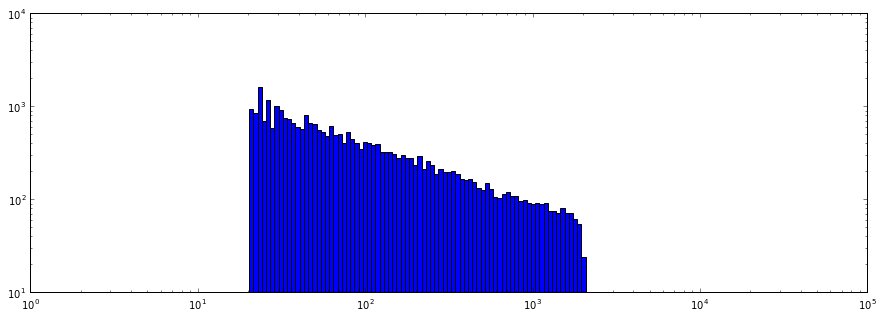

In [116]:
plt.figure(figsize=(15,5))
data = [len(affil2node[key]) for key in affil2node]
pl.hist(data, bins=np.logspace(0, 5, 200))
pl.gca().set_xscale("log")
pl.gca().set_yscale("log")
pl.show()

In [115]:
#filtering
affil2node = dict(filter(lambda x: len(x[1]) > 20 and len(x[1]) < 2000, affil2node.iteritems()))

In [117]:
for i in affil2node[affil2node.keys()[11]]:
    print i, clear_data[i][comm_key]

431 ['crossover operator', 'distribution algorithm', 'radial search', 'graph theoretic approach', 'simple approach', 'simple solution approach', 'algorithm performance', 'decomposition-based multi-objective evolutionary algorithm', 'dynamic resource allocationDifferent crossover', 'hybrid multiobjective evolutionary algorithm']
1213 ['systems theoretic', 'Behavioral Approach Applied', 'Discrete Linear Repetitive ProcessesIn', 'applications interest', 'behavorial approach', 'discrete linear repetitive process', 'exponential trajectory interpretation', 'main result']
8029 ['fuzzy control', 'fuzzy information', 'fuzzy information processing', 'fuzzy theoretic operation', 'application specific microprocessor', 'max instruction', 'dynamic measurement', 'experimental result', 'quantitative technique', 'reduced instruction set computer']
8052 ['layout data', 'automatic layout recycling', 'layout description', 'layout description format', 'layout element', 'layout resource', 'optimal layout', 

In [118]:
affiliations_set_correspond[affiliations_set_correspond.keys()[1000]]

'generator'

In [36]:
G = parse_graph(graph_data_path)

# Генерация тестов

In [140]:
keys = affil2node.keys()
#keys for 'a'
# 1947, 4883 - small and good
# 6028 - big and bad (1 big comm)
#interesting - 5833
key_indx = np.random.randint(len(affil2node))
i = keys[key_indx]
print key_indx
print i
print 
nodes = affil2node[i]
#print nodes
#print
nodes_with_neigb = []
for node in nodes:
    if unicode(node) in G:
        #neigb = G.neighbors(unicode(node))
        nodes_with_neigb.append(unicode(node))
        #nodes_with_neigb.extend(neigb)
print nodes_with_neigb

19025
CMOS technologies scale

[u'35773', u'37133', u'58610', u'65484', u'77965', u'140812', u'201088', u'295575', u'296494', u'296496', u'296497', u'346766', u'374720', u'421644', u'426935', u'486652', u'494363', u'513763', u'549155', u'554393', u'559091', u'572340', u'581241', u'582870', u'584673', u'590602', u'652749', u'696706', u'699802', u'708393', u'790681', u'799788', u'837356', u'843251', u'853603', u'965131', u'965604', u'1041590', u'1058531', u'1102741', u'1102861', u'1126318', u'1169053', u'1180358', u'1181277', u'1194280', u'1263983', u'1274590', u'1279534', u'1289491', u'1335055', u'1359069', u'1370231', u'1486569', u'1568688', u'1585314', u'1595975', u'1596405', u'1621683', u'1625828', u'1638906', u'1645204', u'1663822']


In [141]:
# author_indx_in_G = []
# with file(graph_data_path) as f:
#     for line in log_progress(f, every = 100000):
#         a,b = line.split()[:2]
#         author_indx_in_G.append(int(a))
#         author_indx_in_G.append(int(b))
# author_indx_in_G = set(author_indx_in_G)
# for node in nodes_with_neigb:
#     if int(node) in author_indx_in_G:
#         print node,

In [142]:
comms = []
for node in nodes_with_neigb:
    if int(node) in clear_data:
        comms += [x for x in clear_data[int(node)]['a_c'] if x in affil2node and x not in {'IEEE', 'IEEE Computer Society'}]
comms = set(comms)
comms = sorted(comms, key=lambda x: -len(affil2node[x]))
print '\n'.join(c + ' '*(45-len(c)) + str(len(affil2node[c])) for c in comms)

extended Application Programming             1983
CAD consideration                            1977
Heart rate variability                       1668
IT threat                                    1628
final strong classifier                      1605
3-D IC                                       1600
account travel time consumption              1589
CT adoption research                         1558
CMOS scaling                                 1511
increasing ability                           1504
Control Technology                           1462
FPGA type flexibility                        1358
ATM traffic management telecommunication     1281
Carrier Ethernet                             1255
Adaptive Intelligent Computer Game           1217
Online obstacle avoidance                    1209
Internet account                             1197
Chinese tourism destination                  1193
Enterprise exam                              1148
diverse seamless                             1141


In [143]:
subgraph_nodes = []
for comm in log_progress(comms):
    for node in affil2node[comm]:
        if unicode(node) in G:
            subgraph_nodes.append(unicode(node)) 
subgraph_nodes = set(subgraph_nodes)

In [144]:
len(subgraph_nodes)

38594

In [145]:
G_test = G.subgraph(subgraph_nodes)
print nx.info(G_test)

Name: 
Type: Graph
Number of nodes: 38594
Number of edges: 41160
Average degree:   2.1330


In [146]:
#print "Average clustering coeff: {:.3f}".format(nx.average_clustering(G_test))
print "Number of components: {}".format(nx.number_connected_components(G_test))

Number of components: 16448


In [147]:
G_test_max_nodes = max(nx.connected_components(G_test), key=len)
G_test = G_test.subgraph(G_test_max_nodes)
print 'Biggest comp: {}'.format(len(G_test))
subgraph_nodes = list(G_test.nodes())

Biggest comp: 797


In [148]:
pos=nx.spring_layout(G_test)
print 'Pos!'

Pos!


(-0.75, 0.75)

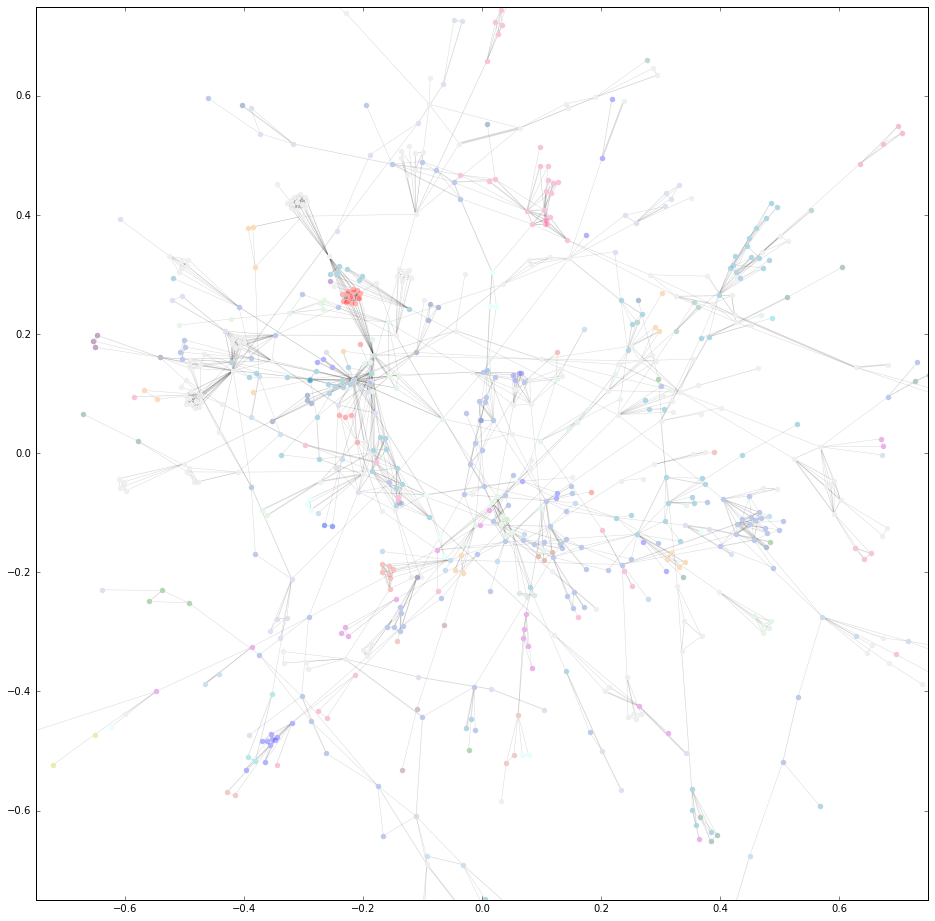

In [149]:
ax = plt.figure(figsize=(16,16))
#nx.draw_networkx(G_test, pos=pos, node_size=25, alpha=0.3, linewidths=0, width=0.5, with_labels=False)
width = [0.5 * np.sqrt(G_test[x[0]][x[1]]['weight']) for x in G_test.edges()]
node_size = 30
nx.draw_networkx_edges(G_test, pos, width=width, alpha=0.15)
nx.draw_networkx_nodes(G_test, pos, node_color='#FFFFFF', node_size=node_size, alpha=1, linewidths=0)
if len(comms) > len(col):
    print 'WARNING: too low colors count'
for j in subgraph_nodes:
    k = 0
    for col_i, i in enumerate(comms):
        if(int(j) in affil2node[i]):
            nx.draw_networkx_nodes(G_test, pos, nodelist=[j], node_color=col[col_i if col_i < len(col) else -1], node_size=node_size-node_size/10*k,
                                   alpha=0.3, linewidths=0, width=0.5, with_labels=False)
            k += 1

bord = 0.75
plt.xlim([-bord, bord])
plt.ylim([-bord, bord])

In [150]:
from big_clam import BigClam
A = np.array(nx.to_numpy_matrix(G_test))
bc = BigClam(A, len(comms)/2, initF='cond_new_randz',sparsity_coef=0.01)
F, LLH = bc.fit()

iter: 797, LLH:-29273.3327965
iter: 1594, LLH:-28247.3124181
iter: 2391, LLH:-27734.9972984
iter: 3188, LLH:-27502.1113924
iter: 3985, LLH:-27319.0436374
iter: 4782, LLH:-27205.4392298
iter: 5579, LLH:-27088.3006342
iter: 6376, LLH:-26979.9625826
iter: 7173, LLH:-26923.6425381
iter: 7970, LLH:-26872.1879589
iter: 8767, LLH:-26790.896023
iter: 9564, LLH:-26744.0922858
iter: 10361, LLH:-26679.3556244
iter: 11158, LLH:-26632.300074
iter: 11955, LLH:-26606.9318575
iter: 12752, LLH:-26552.7357266
iter: 13549, LLH:-26524.4984213
iter: 14346, LLH:-26491.1052953
iter: 15143, LLH:-26469.1474732
iter: 15940, LLH:-26444.3989833
iter: 16737, LLH:-26415.978488
iter: 17534, LLH:-26392.5577369
iter: 18331, LLH:-26378.2356622
iter: 19128, LLH:-26353.6943777
iter: 19925, LLH:-26339.4984133
iter: 20722, LLH:-26330.2715461
iter: 21519, LLH:-26323.2739193
iter: 22316, LLH:-26312.6811101
iter: 23113, LLH:-26288.3343905
iter: 23910, LLH:-26271.8892804
iter: 24707, LLH:-26264.7016557
iter: 25504, LLH:-26247.

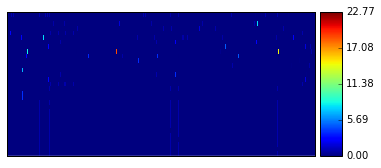

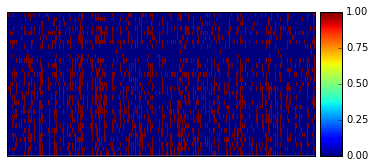

In [151]:
from Experiments import draw_matrix
plt.figure()
draw_matrix(F.T)
plt.figure()
C = F > 1.0*np.sum(A)/(A.shape[0]*(A.shape[0]-1))
draw_matrix(C.T)

In [152]:
affil2node_bc = {i:[] for i in xrange(C.shape[1])}
for indx, node in enumerate(G_test):
    for j in np.where(C[indx])[0]:
        affil2node_bc[j].append(node)
        

(-0.75, 0.75)

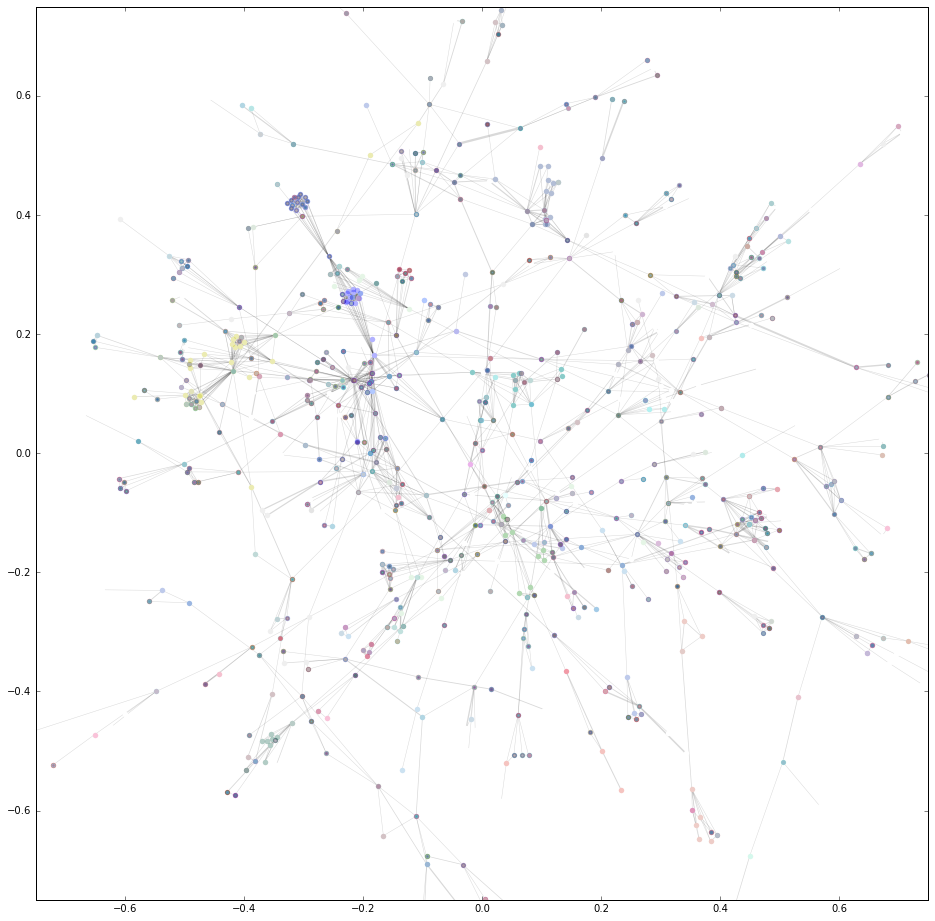

In [153]:
ax = plt.figure(figsize=(16,16))
#nx.draw_networkx(G_test, pos=pos, node_size=25, alpha=0.3, linewidths=0, width=0.5, with_labels=False)
width = [0.5 * np.sqrt(G[x[0]][x[1]]['weight']) for x in G.edges()]
node_size = 30
nx.draw_networkx_edges(G_test, pos, width=width, alpha=0.15)
nx.draw_networkx_nodes(G_test, pos, node_color='#FFFFFF', node_size=node_size, alpha=1, linewidths=0)
if len(comms) > len(col):
    print 'WARNING: too low colors count'
for j in subgraph_nodes:
    k = 0
    for col_i, i in enumerate(xrange(C.shape[1])):
        if(j in affil2node_bc[col_i]):
            nx.draw_networkx_nodes(G_test, pos, nodelist=[j], node_color=col[col_i if col_i < len(col) else -1], node_size=node_size-node_size/10*k,
                                   alpha=0.3, linewidths=0, width=0.5, with_labels=False)
            k += 1

bord = 0.75
plt.xlim([-bord, bord])
plt.ylim([-bord, bord])

In [92]:
A = np.array(nx.to_numpy_matrix(G_test))
bc2 = BigClam(A, len(comms),stepSizeMod='simple')
F2, LLH2 = bc.fit(len(comms)/2)

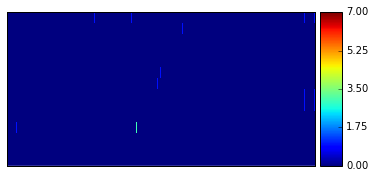

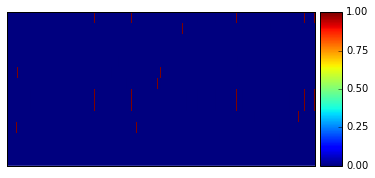

In [96]:
plt.figure()
draw_matrix(F2.T)
plt.figure()
draw_matrix(F2.T!=0)